In [1]:
# Retail Trade Turnover
# https://www.bfs.admin.ch/bfs/en/home/statistics/industry-services/surveys/dhu.html
import pandas as pd  
from pyaxis import pyaxis

# Set start and end date
start_date = "2021-09-28"
end_date = "2023-11-08"

rtt = r"Retail_Trade_Turnover.px"

px = pyaxis.parse(uri=rtt, encoding='ISO-8859-2')

rtt = px['DATA']

rtt["Monat"] = pd.to_datetime(rtt["Monat"], format="%YM%m")
rtt["DATA"] = pd.to_numeric(rtt["DATA"], errors='coerce')
rtt["DATA"] = rtt["DATA"].round(4)

grouped_data = rtt.groupby("Branche / Warengruppe")

group_datasets = {}

for group_name, group_data in grouped_data:
    group_datasets[group_name] = group_data.copy()

rtt = group_datasets['47 (ohne 473): Total Detailhandel ohne Tankstellen']

rtt = rtt.loc[(rtt["Monat"] >= "2021-07-28") & (rtt["Monat"] <= end_date)]

rtt

# Only keep nominal values, indizes and unadjusted values
rtt = rtt[(rtt["Nominal / Real"] == "Nominal") &
                                (rtt["Bereinigung"] == "Unbereinigt") &
                                (rtt["Indizes / Veränderungen"] == "Indizes")]

rtt = rtt[["Monat", "DATA"]]
# Rename columns
rtt.columns = ["Date", "Retail"]

# Data only becomes available at the end of the month
rtt["Date"] = rtt["Date"] + pd.offsets.MonthEnd(0)

# Set index
rtt.set_index("Date", inplace = True)

rtt

,Retail
Date,
2021-08-31,99.7357
2021-09-30,101.1878
2021-10-31,109.1359
2021-11-30,117.3792
2021-12-31,135.0794
2022-01-31,99.2286
2022-02-28,93.6737
2022-03-31,109.7426
2022-04-30,106.5053


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = StandardScaler()
scaler = MinMaxScaler()

rtt["Retail"] = scaler.fit_transform(rtt["Retail"].values.reshape(-1, 1))
rtt.head()

,Retail
Date,
2021-08-31,0.145347
2021-09-30,0.180163
2021-10-31,0.370732
2021-11-30,0.568379
2021-12-31,0.992771


In [3]:
rtt_to_hour = rtt.resample("H").ffill()
rtt_to_hour = rtt_to_hour.reset_index()
rtt = rtt_to_hour.loc[(rtt_to_hour["Date"] >= start_date) & (rtt_to_hour["Date"] <= end_date)]
rtt.set_index("Date")

,Retail
Date,
2021-09-28 00:00:00,0.145347
2021-09-28 01:00:00,0.145347
2021-09-28 02:00:00,0.145347
2021-09-28 03:00:00,0.145347
2021-09-28 04:00:00,0.145347
...,...
2023-09-29 20:00:00,0.244361
2023-09-29 21:00:00,0.244361
2023-09-29 22:00:00,0.244361


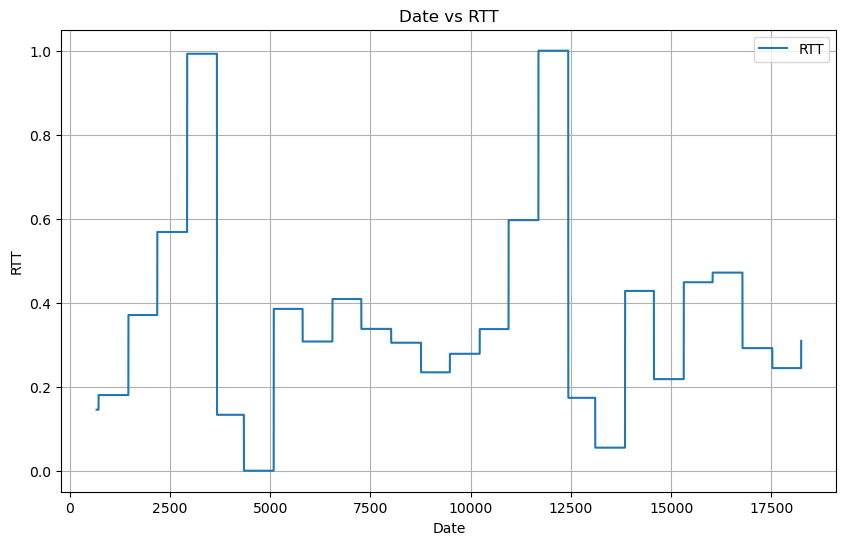

In [4]:
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(rtt.index, rtt["Retail"], label = "RTT")

# Formatting
plt.title('Date vs RTT')
plt.xlabel('Date')
plt.ylabel('RTT')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
rtt.to_csv("rtt_scaled.csv", index=False)